In [1]:
import numpy as np
import matplotlib.pyplot as plt
import wave

In [2]:
def read_wav(filename):
    with wave.open(filename, 'rb') as do:
        frame_rate = do.getframerate()
        n_frame = do.getnframes()
        length = n_frame / frame_rate
        data = do.readframes(n_frame)
        data = np.frombuffer(data, dtype=np.int16)
        
    time = np.linspace(0, length, len(data))
    do.close()
    return time, data, frame_rate

In [3]:
# define function for FT
# let 'centre' to 'True' to set 0 as center
# data >> 1d array with frequency data from real space
# return 1d-array, frequency + real and imaginary part separately
def fourier_tf(data, centre = False):
    # n >> size of data
    n = len(data)
    
    # gap >> index data of given n-elements array
    # cpt >> repeated calculation for FT
    gap = np.arange(n)
    cpt = 2 * np.pi * gap / n
    
    # set empty datasets
    R_data = np.zeros(n)
    I_data = np.zeros(n)
    
    # calculate FT
    # loop has been used since memory is not enough to store n-n array with data
    # For general use, restricted 'for' loop is used. ex) 52432, 2d array is too large for matrix computation.
    for i in range(n):
        inside = cpt * i
        R_data[i] = data @ (np.cos(inside)).T
        I_data[i] = -data @ (np.sin(inside)).T

    # centre >> If True, shift to set 0 as center. default is False
    div_n = n//2
    result = np.zeros((3, n))
    
    result[1] = R_data
    result[2] = I_data
    
    R_data = np.roll(R_data, div_n)
    I_data = np.roll(I_data, div_n)
        
    gap = (gap - div_n) / n
    
    if centre:
        result[0] = gap
        result[1] = R_data
        result[2] = I_data
    else:
        result[0] = np.roll(gap, div_n)
    
    # return value is 2d array with frequency and FT results
    # return Real and Imaginary part seperately
    return result[0], result[1], result[2]

In [4]:
p_time, p_data, p_rate = read_wav('Do262.wav')
p_freq, R_p, I_p = fourier_tf(p_data)

In [5]:
print(p_data.shape)
print(p_rate)

(52992,)
44100


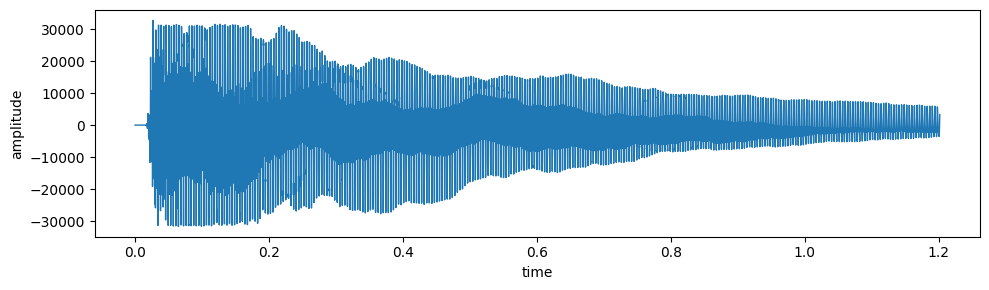

In [6]:
plt.figure(figsize=(10, 3))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(p_time, p_data, linewidth=1)
plt.tight_layout()

In [7]:
p_power = np.abs(R_p + 1j * I_p)**2
p_freqs = p_freq * p_rate
print(p_freqs)

[ 0.          0.83220109  1.66440217 ... -2.49660326 -1.66440217
 -0.83220109]


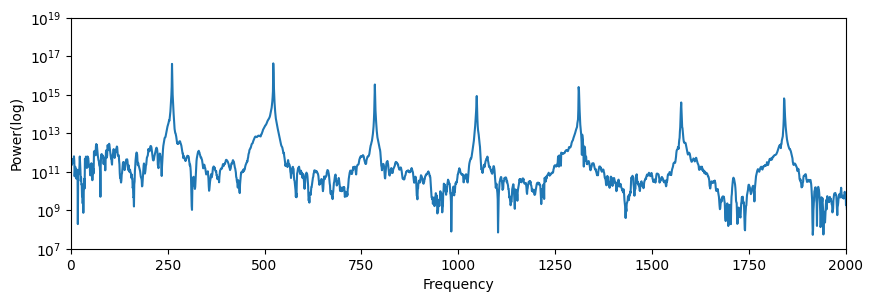

In [8]:
plt.figure(figsize=(10, 3))
plt.xlabel('Frequency')
plt.ylabel('Power(log)')
plt.plot(p_freqs, p_power)
plt.xlim(0, 2000)
plt.ylim(1e7,1e19)
plt.yscale('log')

In [9]:
freq_hw13, R_hw13, I_hw13 = fourier_tf(p_data, centre=True)

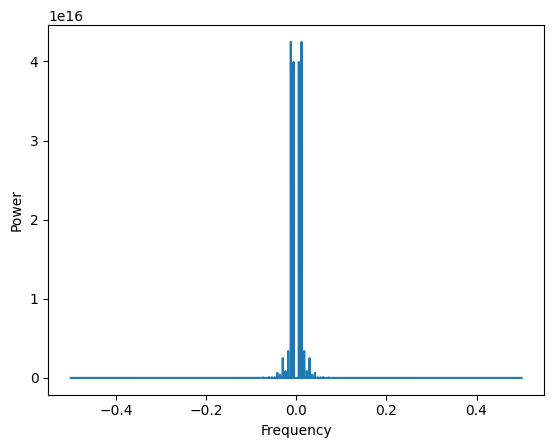

In [10]:
power_hw13 = np.abs(R_hw13 + 1j * I_hw13)**2
plt.figure()
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.plot(freq_hw13, power_hw13)

In [11]:
pos = np.where(freq_hw13 >= 0)[0]
dom_index = pos[np.argmax(power_hw13[pos])]
print(freq_hw13[dom_index] * p_rate)

522.6222826086956


In [12]:
n = 200
local_max_index = []
for i in range(n, len(power_hw13) - n):
    if (power_hw13[i] > np.max(power_hw13[i-n:i])) and (power_hw13[i] > np.max(power_hw13[i+1:i+n+1])):
        if (freq_hw13[i] > 0) and (power_hw13[i] > 1e7):
            local_max_index.append(i)

local_max = [freq_hw13[i] * p_rate for i in local_max_index]
print(local_max)

[np.float64(261.3111413043478), np.float64(522.6222826086956), np.float64(784.765625), np.float64(1047.741168478261), np.float64(1310.7167119565217), np.float64(1575.3566576086957), np.float64(1840.828804347826), np.float64(2108.797554347826), np.float64(2377.5985054347825), np.float64(2648.0638586956525), np.float64(2919.3614130434785), np.float64(3196.4843750000005), np.float64(3475.271739130435), np.float64(3755.7235054347825), np.float64(4037.8396739130435), np.float64(4322.452445652174), np.float64(4906.657608695652), np.float64(5202.088994565218), np.float64(5500.016983695652), np.float64(5803.770380434782), np.float64(6110.020380434782), np.float64(6423.760190217391), np.float64(6620.991847826086), np.float64(7065.387228260869), np.float64(7473.997961956522), np.float64(7713.671875), np.float64(7994.955842391305), np.float64(8431.861413043478), np.float64(8664.045516304348), np.float64(8882.914402173914), np.float64(9191.661005434784), np.float64(9452.139945652174), np.float64(9

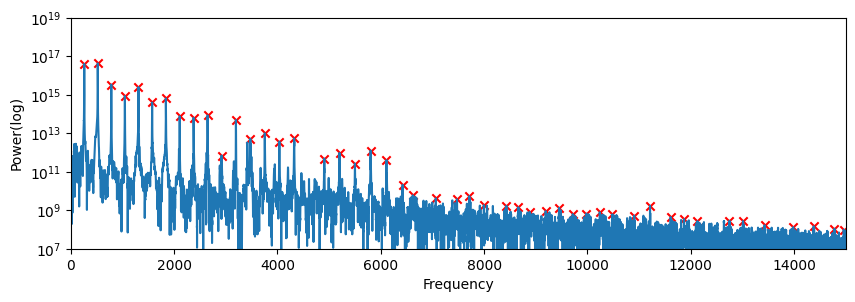

In [13]:
plt.figure(figsize=(10, 3))
plt.xlabel('Frequency')
plt.ylabel('Power(log)')
plt.plot(p_freqs, p_power)
plt.scatter(local_max, power_hw13[local_max_index], color='red', marker='x', label='local max')
plt.xlim(0, 15000)
plt.ylim(1e7,1e19)
plt.yscale('log')

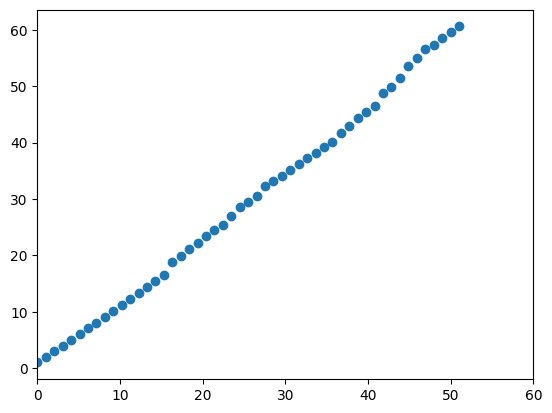

In [14]:
lm_arr = np.array(local_max)
lm_arr = lm_arr / lm_arr[0]
plt.figure()
plt.xlim(0, 60)
plt.scatter(np.linspace(0, len(lm_arr), len(lm_arr)), lm_arr)

기울기	: 1.0631112896808983
MSE	: 0.1993118650750367


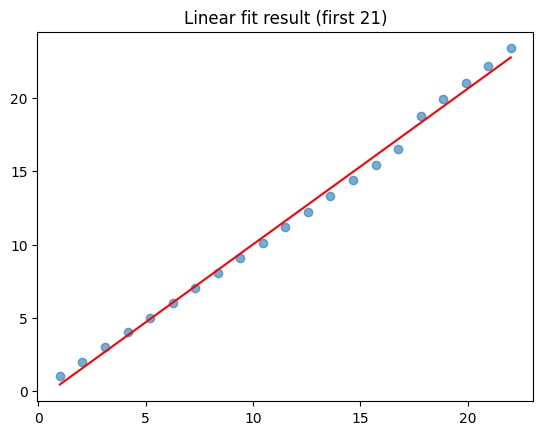

In [15]:
est_x = np.linspace(1, len(lm_arr[:21]) + 1, len(lm_arr[:21]))
y = lm_arr[:21]

cf = np.polyfit(est_x, y, 1)
result_fit = np.polyval(cf, est_x)

plt.figure()
plt.scatter(est_x, y, alpha=0.6)
plt.plot(est_x, result_fit, color='red')
plt.title('Linear fit result (first 21)')
print("기울기\t: " + str(cf[0]))

err_arr = np.copy(lm_arr[:21])

fit_err = np.mean((err_arr - result_fit)**2)
print("MSE\t: " + str(fit_err))

From here, analysis of recorded "do".

In [16]:
h1_time, h1_data, h1_rate = read_wav('do_h1.wav')
rate_h1, Rh1, Ih1 = fourier_tf(h1_data)

In [17]:
h1_tf = Rh1 + 1j * Ih1
freq_h1 = rate_h1 * h1_rate
h1_power = np.abs(h1_tf)**2

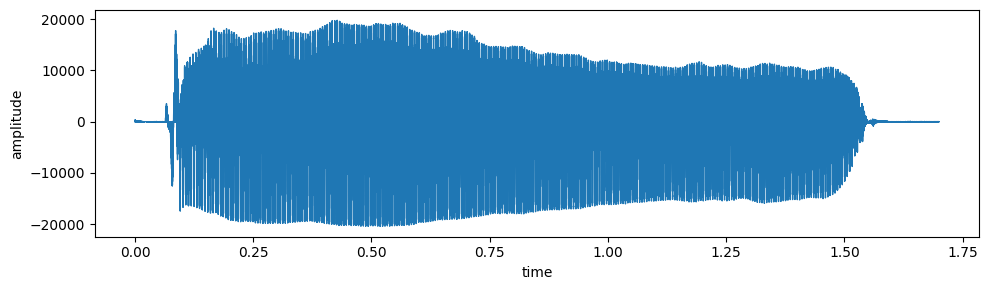

In [18]:
plt.figure(figsize=(10, 3))
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(h1_time, h1_data, linewidth=1)
plt.tight_layout()

In [44]:
print(h1_data.shape)

(163200,)


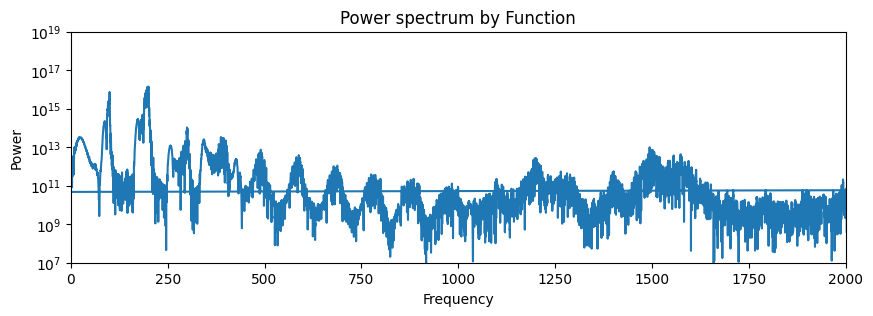

In [19]:
plt.figure(figsize=(10, 3))
plt.plot(freq_h1, h1_power)
plt.title('Power spectrum by Function')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim(0, 2000)
plt.ylim(1e7, 1e19)
plt.yscale('log')

C:\Users\AGN\AppData\Local\Temp\ipykernel_4952\273844494.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


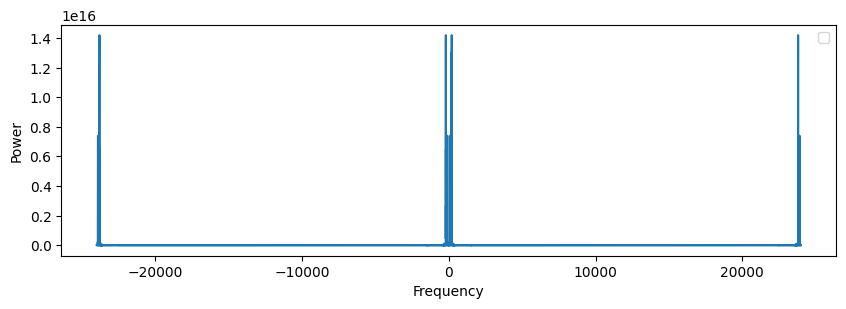

In [20]:
plt.figure(figsize=(10, 3))
plt.plot(freq_h1, h1_power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend()
plt.show()

In [21]:
pos_h1 = np.where(freq_h1 >= 0)[0]
dom_index_h1 = pos_h1[np.argmax(h1_power[pos_h1])]
print(rate_h1[dom_index_h1] * h1_rate)

23799.411764705885


In [22]:
k = 100
local_max_index_h1 = []
for i in range(k, len(h1_power) - k):
    if (h1_power[i] > np.max(h1_power[i-k:i])) and (h1_power[i] > np.max(h1_power[i+1:i+k+1])):
        if (rate_h1[i] > 0) and (h1_power[i] > 1e7):
            local_max_index_h1.append(i)

local_max_h1 = [rate_h1[i] * h1_rate for i in local_max_index_h1]
print(local_max_h1)

[np.float64(100.29411764705883), np.float64(200.58823529411765), np.float64(257.6470588235294), np.float64(300.0), np.float64(343.5294117647059), np.float64(387.3529411764706), np.float64(490.2941176470588), np.float64(588.5294117647059), np.float64(687.9411764705882), np.float64(774.7058823529412), np.float64(884.7058823529412), np.float64(983.5294117647059), np.float64(1098.5294117647059), np.float64(1200.8823529411764), np.float64(1264.7058823529412), np.float64(1401.1764705882351), np.float64(1493.8235294117646), np.float64(1573.8235294117649), np.float64(1709.4117647058824), np.float64(1793.529411764706), np.float64(1899.1176470588236), np.float64(1992.9411764705883), np.float64(2058.235294117647), np.float64(2102.0588235294117), np.float64(2193.529411764706), np.float64(2260.8823529411766), np.float64(2312.0588235294117), np.float64(2359.4117647058824), np.float64(2412.3529411764703), np.float64(2512.6470588235293), np.float64(2601.176470588235), np.float64(2688.8235294117644), n

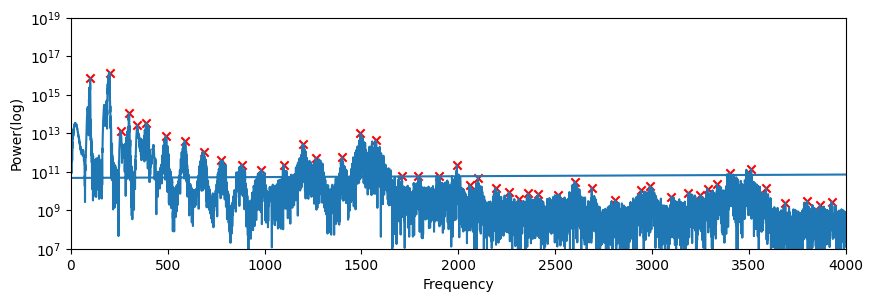

In [23]:
plt.figure(figsize=(10, 3))
plt.xlabel('Frequency')
plt.ylabel('Power(log)')
plt.plot(freq_h1, h1_power)
plt.scatter(local_max_h1, h1_power[local_max_index_h1], color='red', marker='x', label='local max')
plt.xlim(0, 4000)
plt.ylim(1e7,1e19)
plt.yscale('log')

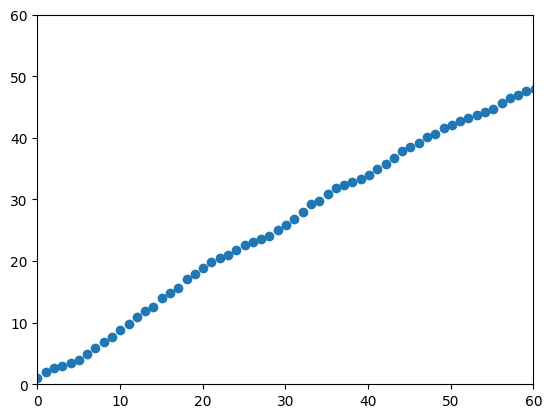

In [24]:
lm_arr_h1 = np.array(local_max_h1)
lm_arr_h1 = lm_arr_h1 / lm_arr_h1[0]
plt.figure()
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.scatter(np.linspace(0, len(lm_arr_h1), len(lm_arr_h1)), lm_arr_h1)

기울기	: 0.8730188956414342
MSE	: 0.27093901476032484


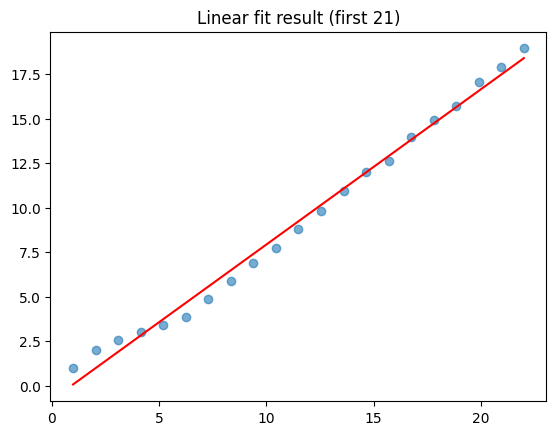

In [25]:
est_x_h1 = np.linspace(1, len(lm_arr_h1[:21]) + 1, len(lm_arr_h1[:21]))
y_h1 = lm_arr_h1[:21]

cf_h1 = np.polyfit(est_x_h1, y_h1, 1)
result_fit_h1 = np.polyval(cf_h1, est_x_h1)

plt.figure()
plt.scatter(est_x_h1, y_h1, alpha=0.6)
plt.plot(est_x_h1, result_fit_h1, color='red')
plt.title('Linear fit result (first 21)')
print("기울기\t: " + str(cf_h1[0]))

err_arr_h1 = np.copy(lm_arr_h1[:21])

fit_err_h1 = np.mean((err_arr_h1 - result_fit_h1)**2)
print("MSE\t: " + str(fit_err_h1))

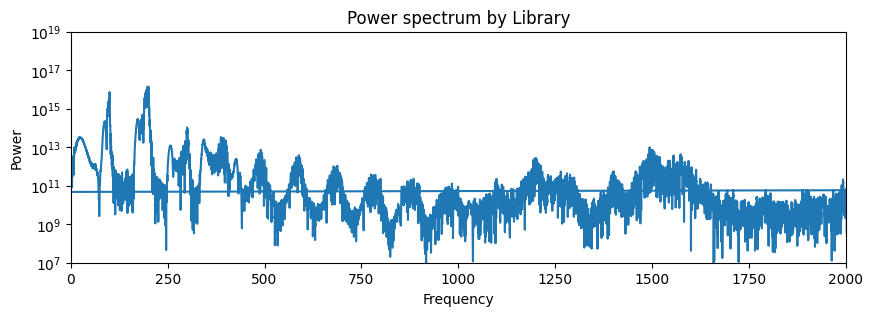

In [26]:
import numpy.fft as npf

lib_result = npf.fft(h1_data)
lib_freq = npf.fftfreq(len(h1_data), 1/h1_rate)
lib_power = np.abs(lib_result)**2
plt.figure(figsize=(10, 3))
plt.plot(lib_freq, lib_power)
plt.title('Power spectrum by Library')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim(0, 2000)
plt.ylim(1e7, 1e19)
plt.yscale('log')
plt.show()

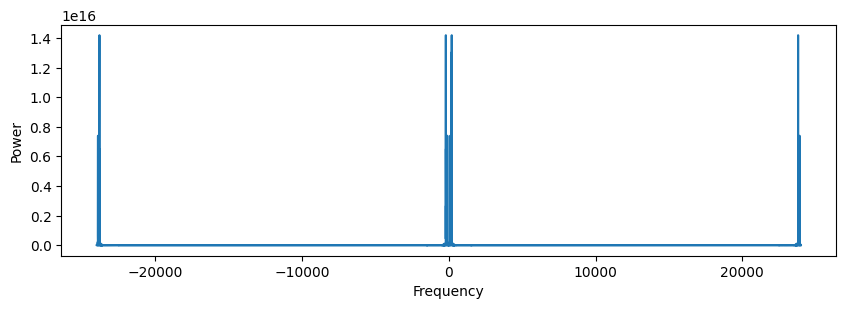

In [27]:
plt.figure(figsize=(10, 3))
plt.plot(lib_freq, lib_power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [28]:
# fft 모듈 vs 구현한 함수
diff = h1_tf - lib_result
ft_mse = np.mean(np.abs(diff)**2)
print('MSE:', ft_mse)

MSE: 4.0242490142605575e-09


In [29]:
from scipy.signal import butter, lfilter

In [30]:
def highpass_filter(data, sample_rate, cutoff, order=5):
    nyq = 0.5 * sample_rate
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='high', analog=False)
    return lfilter(b, a, data)

def lowpass_filter(data, sample_rate, cutoff, order=5):
    nyq = 0.5 * sample_rate
    norm_cutoff = cutoff / nyq
    b, a = butter(order, norm_cutoff, btype='low', analog=False)
    return lfilter(b, a, data)

In [31]:
cutoff = 150
audio_filter = np.copy(h1_data)
audio_filter = highpass_filter(audio_filter, h1_rate, cutoff)

cutoff = 8000
audio_filter = lowpass_filter(audio_filter, h1_rate, cutoff)

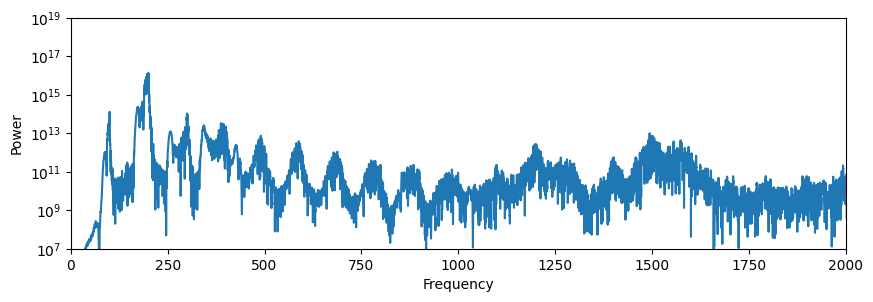

In [32]:
filt_result = npf.fft(audio_filter)
filt_freq = npf.fftfreq(len(audio_filter), 1/h1_rate)
filt_power = np.abs(filt_result)**2

plt.figure(figsize=(10, 3))
plt.plot(filt_freq, filt_power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.xlim(0, 2000)
plt.ylim(1e7, 1e19)
plt.yscale('log')
plt.show()

c:\Python313\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Python313\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


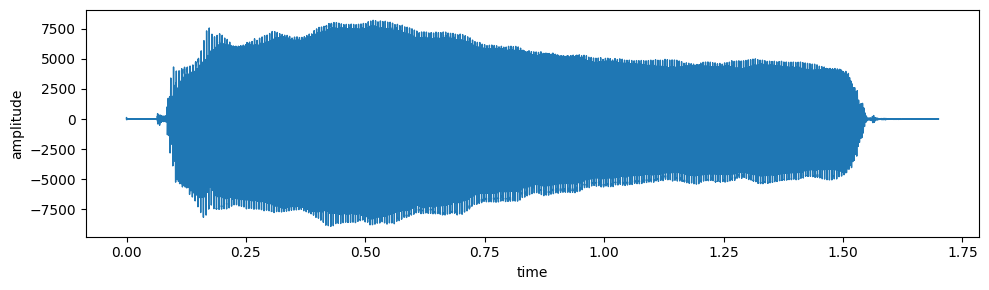

In [33]:
filt_result = npf.ifft(filt_result)
plt.figure(figsize=(10, 3))
plt.plot(h1_time, filt_result, linewidth=1)
plt.xlabel('time')
plt.ylabel('amplitude')
plt.tight_layout()
plt.show()

In [34]:
rate_h1, Rh1, Ih1 = fourier_tf(h1_data)

In [35]:
lib_result = npf.fft(h1_data)

In [45]:
def lin_log(x):
    return x * np.log(x)

def sec_pow(x):
    return x**2

samples = np.linspace(1, len(h1_data) + 1, len(h1_data))

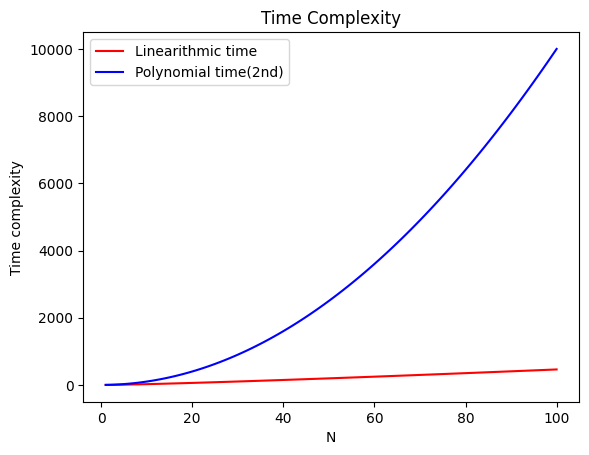

In [60]:
plt.figure()
plt.plot(samples[:100], lin_log(samples[:100]), label='Linearithmic time', color='red')
plt.plot(samples[:100], sec_pow(samples[:100]), label='Polynomial time(2nd)', color='blue')
plt.title('Time Complexity')
plt.xlabel('N')
plt.ylabel('Time complexity')
plt.legend()

In [63]:
print(np.abs(lin_log(163200) - sec_pow(163200)) / 1e9)

26.632281154183048
